## Final Project Submission

**Please fill out:
* Student name:  Victor Kabui Karanja
* Student pace: part time
* Scheduled project review date/time: 10/11/2022
* Instructor name:
* Blog post URL:**


# Microsoft Movie Analysis

**# Overview**

The project analyses the performance of various types movies from various datasets and takes into the consideration the rate of return on investment for Microsoft. Exploratory data Analysis is performed to identify the most appropriate type of movie for starters. The analysis can be used by 'Microsoft' to identify which types of movie to invest in.

**# Business Problem**

Microsoft wills to venture into the movie creation sector to increase the scope of their services to the public, this would bring in more revenue by creating traffic on their movie studio. Below I use the data from imdb and other sources to analyse the best type of films for them by checking on ratings, reviews and the budgets for each film.

**# Data Understanding**

In [2]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Assigning the csv files of the files to use in the analysis
title_basic = pd.read_csv('./zippedData/imdb.title.akas.csv.gz', index_col=0)
title_ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz', index_col=0)
moviegros = pd.read_csv('./zippedData/bom.movie_gross.csv.gz', index_col=0)
moviebudget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz', index_col=0)
movies = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col=0)

*IMDB TITLE BASICS FILE*

In [4]:
title_basic.head()

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [5]:
# Obtain the general information of the data including the data type and tally of non missing values
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [6]:
# Obtain the number of missing values per column
title_basic.isna().sum()

ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [7]:
# obtain the percentage of missing values
percent_missing = title_basic.isna().sum()/title_basic.shape[0]*100
percent_missing

ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attributes           95.500493
is_original_title     0.007537
dtype: float64

Types, Languages and attributes have about half or more than half missing values, as a result it is advisable to drop the columns.
The is_original_title has very few missing values which can not have an effect if those entries are dropped.
The region column being a categorical value, the missing values can be filled with the mode

In [8]:
#dropping types,languages and attributes
title_basic.drop(columns=['types','language','attributes'], inplace=True)
#preview whether the columns are dropped
title_basic.head()

,ordering,title,region,is_original_title
title_id,,,,
tt0369610,10,Джурасик свят,BG,0.0
tt0369610,11,Jurashikku warudo,JP,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,0.0
tt0369610,14,Jurassic World,FR,0.0


In [9]:
# Fill the missing values in region using mode
title_basic.region.fillna(title_basic.region.mode()[0], inplace=True)

In [10]:
# drop the entries with missing values for is_original_title
title_basic.dropna(inplace=True)

In [11]:
# Re-Check for missing values
title_basic.isna().sum()

ordering             0
title                0
region               0
is_original_title    0
dtype: int64

In [12]:
# Re-check the information on the rows
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331678 entries, tt0369610 to tt9880178
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331678 non-null  int64  
 1   title              331678 non-null  object 
 2   region             331678 non-null  object 
 3   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.7+ MB


Having removed the missing values in the dataset for title basic and ensuring the columns haave the correct 
type of data, it's data understanding is completed

*IMDB TITLE RATINGS FILE*

In [13]:
# Preview the nature of the data
title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [14]:
#renaming the index tconst to title_id
title_ratings.index.rename('title_id', inplace=True)
title_ratings.head()

,averagerating,numvotes
title_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [15]:
# Checking the nature of info
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


The data does not have any missing values in any of the two columns present.
The columns in this dataset also have the correct type of data

*BOM MOVIE GROSS FILE*

In [16]:
moviegros.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [18]:
moviegros.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [19]:
# obtain the percentage of missing values
percent_missing = moviegros.isna().sum()/moviegros.shape[0]*100
percent_missing

studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

with foreign gross missing so many values, we will drop it and find its data from another dataset

In [20]:
moviegros.drop(columns='foreign_gross', inplace=True)

In [21]:
moviegros.head()

,studio,domestic_gross,year
title,,,
Toy Story 3,BV,415000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
Shrek Forever After,P/DW,238700000.0,2010


In [22]:
moviegros.isna().sum()

studio             5
domestic_gross    28
year               0
dtype: int64

In [23]:
moviegros.studio.fillna(moviegros.studio.mode()[0], inplace=True)


In [24]:
moviegros.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [25]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 105.8+ KB


In [26]:
moviegros.dropna(inplace=True)

In [27]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, Toy Story 3 to An Actor Prepares
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3359 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 105.0+ KB


*MOVIE BUDGETS*

In [28]:
moviebudget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [30]:
moviebudget.release_date = pd.DatetimeIndex(moviebudget.release_date).year
moviebudget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
# Renaming the movie column to title
moviebudget.rename(columns={'movie':'title', 'worldwide_gross':'foreign_gross'}, inplace=True)
moviebudget.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The above dataset does not contain any missing values in them

*MOVIES (tmdb.movies)*

In [32]:
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [33]:
movies.release_date = pd.DatetimeIndex(movies.release_date).year
movies.drop(columns='original_title', inplace=True)
movies.head()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010,Inception,8.3,22186


In [34]:
movies.set_index('id',inplace=True)

In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 12444 to 309885
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   original_language  26517 non-null  object 
 2   popularity         26517 non-null  float64
 3   release_date       26517 non-null  int64  
 4   title              26517 non-null  object 
 5   vote_average       26517 non-null  float64
 6   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [36]:
movies.head()

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
id,,,,,,,
12444,"[12, 14, 10751]",en,33.533,2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,"[14, 12, 16, 10751]",en,28.734,2010,How to Train Your Dragon,7.7,7610
10138,"[12, 28, 878]",en,28.515,2010,Iron Man 2,6.8,12368
862,"[16, 35, 10751]",en,28.005,1995,Toy Story,7.9,10174
27205,"[28, 878, 12]",en,27.920,2010,Inception,8.3,22186


The dataset has no null values and the columns have the correct data type

# Data Preparation

Here we explore the various ways of cleaning the data to remove the duplicates as well as merge the datasets in preparation for exploratory data analysis and visualisation.
In data cleaning, we remove the '$' signs on the columns and put the data in a means that it can be well understood.

**Data Cleaning**

*title basics*

In [37]:
title_basic.head()

,ordering,title,region,is_original_title
title_id,,,,
tt0369610,10,Джурасик свят,BG,0.0
tt0369610,11,Jurashikku warudo,JP,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,0.0
tt0369610,14,Jurassic World,FR,0.0


In [38]:
title_basic[title_basic.duplicated(subset='title')==True]

,ordering,title,region,is_original_title
title_id,,,,
tt0369610,15,Jurassic World,GR,0.0
tt0369610,16,Jurassic World,IT,0.0
tt0369610,20,Jurassic World,SE,0.0
tt0369610,22,Jurassic World 3D,DE,0.0
tt0369610,23,Jurassic World 3D,XWW,0.0
...,...,...,...,...
tt9705860,3,Dusan Vukotic hrvatski okarovac,HR,0.0
tt9723084,2,Anderswo. Allein in Afrika,US,1.0
tt9755806,3,Big Shark,US,1.0


In [39]:
title_basic.drop_duplicates(subset='title', keep = 'first',inplace=True)

In [40]:
title_basic.duplicated().sum()

0

There are zero duplicates of the data above with reference to the title

*title ratings*

In [41]:
title_ratings.head()

,averagerating,numvotes
title_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [42]:
title_ratings.duplicated().sum()

45074

It is wise not to drop the duplicates at this position until we have merged the dataseet

*BOM movie Budget*

In [43]:
moviebudget.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [44]:
moviebudget.columns = moviebudget.columns.str.replace('\t', '', regex=True)
moviebudget.production_budget = moviebudget['production_budget'].str.replace('$', '',regex=True)
moviebudget.domestic_gross = moviebudget.domestic_gross.str.replace('$', '', regex=True)
moviebudget.foreign_gross = moviebudget.foreign_gross.str.replace('$', '', regex=True)


In [45]:
moviebudget.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
1,2009,Avatar,"425,000,000","760,507,625","2,776,345,279"
2,2011,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
3,2019,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
4,2015,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
5,2017,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [46]:
# Removing commas in the digits and making them integers
moviebudget.production_budget = moviebudget['production_budget'].str.replace(',', '',regex=True).astype('int64')
moviebudget.domestic_gross = moviebudget.domestic_gross.str.replace(',', '', regex=True).astype('int64')
moviebudget.foreign_gross = moviebudget.foreign_gross.str.replace(',', '', regex=True).astype('int64')

In [47]:
moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   int64 
 1   title              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   foreign_gross      5782 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 271.0+ KB


In [48]:
moviebudget.head()

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
1,2009,Avatar,425000000,760507625,2776345279
2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,2019,Dark Phoenix,350000000,42762350,149762350
4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [49]:
# Identify the duplicates using the title and release date as the subset
moviebudget[moviebudget.duplicated(subset=['title', 'release_date'],keep=False)==True]

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,
56,2009,Home,12000000,0,0
60,2009,Home,500000,15433,44793168


In [50]:
#drop the duplicates
moviebudget.drop_duplicates(subset=['title', 'release_date'],keep='last',inplace=True)

In [51]:
# confirming removal of the duplicates using the title and release date as the subset
moviebudget[moviebudget.duplicated(subset=['title', 'release_date'],keep=False)==True]

,release_date,title,production_budget,domestic_gross,foreign_gross
id,,,,,


<AxesSubplot:>

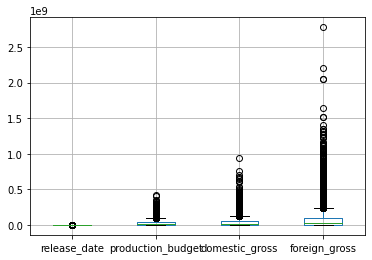

In [52]:
moviebudget.boxplot()

*moviegros*

In [53]:
moviegros.head()

,studio,domestic_gross,year
title,,,
Toy Story 3,BV,415000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
Inception,WB,292600000.0,2010
Shrek Forever After,P/DW,238700000.0,2010


In [54]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3359 entries, Toy Story 3 to An Actor Prepares
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3359 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 105.0+ KB


The data does not have any null values

<AxesSubplot:>

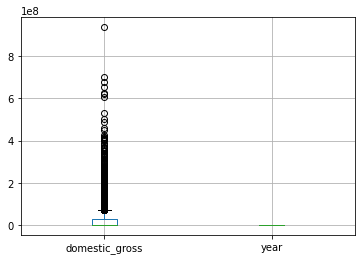

In [55]:
moviegros.boxplot()

*movies*

In [56]:
movies.head()

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
id,,,,,,,
12444,"[12, 14, 10751]",en,33.533,2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,"[14, 12, 16, 10751]",en,28.734,2010,How to Train Your Dragon,7.7,7610
10138,"[12, 28, 878]",en,28.515,2010,Iron Man 2,6.8,12368
862,"[16, 35, 10751]",en,28.005,1995,Toy Story,7.9,10174
27205,"[28, 878, 12]",en,27.920,2010,Inception,8.3,22186


In [57]:
movies[movies.duplicated(keep=False)==True].head(50)

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
id,,,,,,,
862,"[16, 35, 10751]",en,28.005,1995,Toy Story,7.9,10174
863,"[16, 35, 10751]",en,22.698,1999,Toy Story 2,7.5,7553
239,"[35, 10749]",en,14.200,1959,Some Like It Hot,8.2,1562
20526,"[12, 28, 878]",en,13.459,2010,TRON: Legacy,6.3,4387
9994,"[35, 16, 10751]",en,13.348,1986,The Great Mouse Detective,7.1,769
11645,"[28, 18, 36]",ja,10.885,1985,Ran,8.1,600
46705,"[18, 10749]",en,8.994,2010,Blue Valentine,6.9,1677
45649,"[35, 18, 14, 27, 9648]",en,8.319,2010,Rubber,5.9,417
39356,"[18, 35]",en,7.759,2012,Boy,7.5,149


In [58]:
# Dropping the duplicates
movies.drop_duplicates(subset=None, keep='last',inplace=True)

In [59]:
#Confirming that all the duplicates were removed
movies[movies.duplicated(keep=False)==True]

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
id,,,,,,,


<AxesSubplot:>

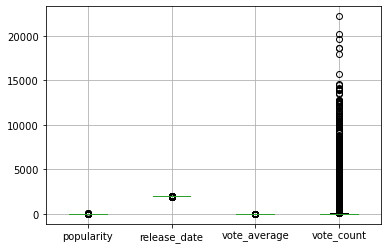

In [60]:
movies.boxplot()

**Merging Datasets**

In [61]:
# merge title_basic and title_ratings as df1
df1 = title_basic.merge(title_ratings,on='title_id')
df1.head()

,ordering,title,region,is_original_title,averagerating,numvotes
title_id,,,,,,
tt0369610,10,Джурасик свят,BG,0.0,7.0,539338
tt0369610,11,Jurashikku warudo,JP,0.0,7.0,539338
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0,7.0,539338
tt0369610,13,O Mundo dos Dinossauros,BR,0.0,7.0,539338
tt0369610,14,Jurassic World,FR,0.0,7.0,539338


In [62]:
#merge df1 with the bom dataset as df2
df2 = df1.merge(moviegros, on='title')
df2.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,domestic_gross,year
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,652300000.0,2015
1,16,John Carter,PT,0.0,6.6,241792,BV,73100000.0,2012
2,14,From Paris with Love,FR,0.0,6.5,107079,LGF,24100000.0,2010
3,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,113200000.0,2012
4,19,Limitless,US,1.0,7.4,492490,Rela.,79200000.0,2011


In [63]:
#merge df2 with udget dataset as df3
df3 = df2.merge(moviebudget, on='title')
df3.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,domestic_gross_x,year,release_date,production_budget,domestic_gross_y,foreign_gross
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,652300000.0,2015,2015,215000000,652270625,1648854864
1,16,John Carter,PT,0.0,6.6,241792,BV,73100000.0,2012,2012,275000000,73058679,282778100
2,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,113200000.0,2012,2012,125000000,113203870,280355920
3,19,Limitless,US,1.0,7.4,492490,Rela.,79200000.0,2011,2011,27000000,79249455,155564919
4,11,Broken City,US,0.0,6.2,71704,Fox,19700000.0,2013,2013,35000000,19701164,34480045


In [64]:
# merge the movies dataset onto df3 as df
df = df3.merge(movies, on='title')
df.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,domestic_gross_x,year,release_date_x,production_budget,domestic_gross_y,foreign_gross,genre_ids,original_language,popularity,release_date_y,vote_average,vote_count
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,652300000.0,2015,2015,215000000,652270625,1648854864,"[28, 12, 878, 53]",en,20.709,2015,6.6,14056
1,16,John Carter,PT,0.0,6.6,241792,BV,73100000.0,2012,2012,275000000,73058679,282778100,"[28, 12, 878]",en,18.549,2012,6.1,3338
2,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,113200000.0,2012,2012,125000000,113203870,280355920,"[28, 53]",en,18.050,2012,6.1,3630
3,19,Limitless,US,1.0,7.4,492490,Rela.,79200000.0,2011,2011,27000000,79249455,155564919,"[53, 9648, 878]",en,19.453,2011,7.1,6295
4,11,Broken City,US,0.0,6.2,71704,Fox,19700000.0,2013,2013,35000000,19701164,34480045,"[53, 80, 18]",en,13.646,2013,5.9,814


In [65]:
df.drop(columns=['domestic_gross_x', 'release_date_x', 'release_date_y'], inplace=True)
df.rename(columns={'domestic_gross_y':'domestic_gross'},inplace=True)
df.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,year,production_budget,domestic_gross,foreign_gross,genre_ids,original_language,popularity,vote_average,vote_count
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,2015,215000000,652270625,1648854864,"[28, 12, 878, 53]",en,20.709,6.6,14056
1,16,John Carter,PT,0.0,6.6,241792,BV,2012,275000000,73058679,282778100,"[28, 12, 878]",en,18.549,6.1,3338
2,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,2012,125000000,113203870,280355920,"[28, 53]",en,18.050,6.1,3630
3,19,Limitless,US,1.0,7.4,492490,Rela.,2011,27000000,79249455,155564919,"[53, 9648, 878]",en,19.453,7.1,6295
4,11,Broken City,US,0.0,6.2,71704,Fox,2013,35000000,19701164,34480045,"[53, 80, 18]",en,13.646,5.9,814


In [66]:
# Calculating the total income from the foreign market ad from internal markets
# Calculating the profits assuming that the production budget takes care of all expenses to reach the viewers
df['Total_Gross'] = df['foreign_gross'] + df['domestic_gross']
df['Profit'] = df['Total_Gross'] - df['production_budget']
df.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,year,production_budget,domestic_gross,foreign_gross,genre_ids,original_language,popularity,vote_average,vote_count,Total_Gross,Profit
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,2015,215000000,652270625,1648854864,"[28, 12, 878, 53]",en,20.709,6.6,14056,2301125489,2086125489
1,16,John Carter,PT,0.0,6.6,241792,BV,2012,275000000,73058679,282778100,"[28, 12, 878]",en,18.549,6.1,3338,355836779,80836779
2,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,2012,125000000,113203870,280355920,"[28, 53]",en,18.050,6.1,3630,393559790,268559790
3,19,Limitless,US,1.0,7.4,492490,Rela.,2011,27000000,79249455,155564919,"[53, 9648, 878]",en,19.453,7.1,6295,234814374,207814374
4,11,Broken City,US,0.0,6.2,71704,Fox,2013,35000000,19701164,34480045,"[53, 80, 18]",en,13.646,5.9,814,54181209,19181209


In [67]:
df['genre_ids'] = df['genre_ids'].str.replace('[','',regex=True)
df['genre_ids'] = df['genre_ids'].str.replace(']','',regex=True)
df['genre_ids'] = df['genre_ids'].str.replace(',','',regex=True)
df['genre_ids'].astype(str)

0       28 12 878 53
1          28 12 878
2              28 53
3        53 9648 878
4           53 80 18
            ...     
1222           18 53
1223     16 12 10751
1224     35 18 10749
1225              35
1226     35 18 10749
Name: genre_ids, Length: 1227, dtype: object

In [68]:
# A dictionary of the genre names for the genre_ids provided in the dataset
genre_name = {'Action':'28', 'Adventure':'12', 'Animation':'16', 'Comedy':'35', 'Crime':'80', 'Documentary':'99', 'Drama':'18',
                'Family':'10751', 'Fantasy':'14', 'History':'36', 'Horror':'27', 'Music':'10402', 'Mystery':'9648',
                'Romance':'10749', 'Science Fiction':'878', 'TV Movie':'10770', 'Thriller':'53', 'War':'10752', 'Western':'37'
}

In [69]:
df['genre']=df.genre_ids.apply(lambda x: 'Action' if '28' in x
                                    else'Adventure' if '12' in x
                                    else 'comedy' if '35' in x
                                    else 'crime' if '80' in x
                                    else 'Documentary' if '99' in x
                                    else 'Drama' if '18' in x
                                    else 'Family' if '10751' in x
                                    else 'Fantasy' if '14' in x
                                    else 'History' if '36' in x
                                    else 'Horror' if '27' in x
                                    else 'Music' if '10402' in x
                                    else 'Mystery' if '9648' in x
                                    else 'Romance' if '10749' in x
                                    else 'Science Fiction' if '878' in x
                                    else 'TV movie' if '10770' in x
                                    else 'Thriller' if '53' in x
                                    else 'War' if '10752' in x
                                    else 'Western'
                                )
df.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,year,production_budget,domestic_gross,foreign_gross,genre_ids,original_language,popularity,vote_average,vote_count,Total_Gross,Profit,genre
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,2015,215000000,652270625,1648854864,28 12 878 53,en,20.709,6.6,14056,2301125489,2086125489,Action
1,16,John Carter,PT,0.0,6.6,241792,BV,2012,275000000,73058679,282778100,28 12 878,en,18.549,6.1,3338,355836779,80836779,Action
2,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,2012,125000000,113203870,280355920,28 53,en,18.050,6.1,3630,393559790,268559790,Action
3,19,Limitless,US,1.0,7.4,492490,Rela.,2011,27000000,79249455,155564919,53 9648 878,en,19.453,7.1,6295,234814374,207814374,Mystery
4,11,Broken City,US,0.0,6.2,71704,Fox,2013,35000000,19701164,34480045,53 80 18,en,13.646,5.9,814,54181209,19181209,crime


In [70]:
df.drop(columns=['genre_ids', 'vote_average', 'vote_count'], inplace=True)
df.head()

,ordering,title,region,is_original_title,averagerating,numvotes,studio,year,production_budget,domestic_gross,foreign_gross,original_language,popularity,Total_Gross,Profit,genre
0,14,Jurassic World,FR,0.0,7.0,539338,Uni.,2015,215000000,652270625,1648854864,en,20.709,2301125489,2086125489,Action
1,16,John Carter,PT,0.0,6.6,241792,BV,2012,275000000,73058679,282778100,en,18.549,355836779,80836779,Action
2,32,The Bourne Legacy,US,1.0,6.7,268678,Uni.,2012,125000000,113203870,280355920,en,18.050,393559790,268559790,Action
3,19,Limitless,US,1.0,7.4,492490,Rela.,2011,27000000,79249455,155564919,en,19.453,234814374,207814374,Mystery
4,11,Broken City,US,0.0,6.2,71704,Fox,2013,35000000,19701164,34480045,en,13.646,54181209,19181209,crime


In [71]:
df.genre.value_counts()

Action             332
Drama              296
comedy             294
Adventure          107
Horror              72
crime               67
Documentary         17
Western             12
Thriller             7
Family               6
Fantasy              6
Mystery              5
Science Fiction      3
Romance              2
History              1
Name: genre, dtype: int64

# Analysis

For analysis to see the various relationships and  determine the best suitable genre for microsoft to venture into. We target maximum profits and high ratings of movies in the studio.

In [72]:
df_yrs = df[df['year']>=2014]
df_yrs2 = df[df['year']<2014]

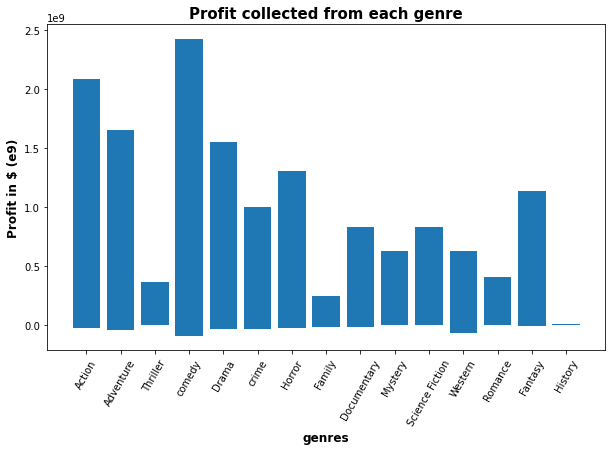

In [75]:
# I start by checking the relationship between the profit and the genres.
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(x='genre', height=df['Profit'], width=0.8, data=df.sort_values('Profit', ascending=False))
plt.xticks(rotation='60')
plt.xlabel('genres', fontdict={'color':'black', 'fontweight':'bold', 'fontsize':12})
plt.ylabel('Profit in $ (e9)', fontdict={'color':'black', 'fontweight':'bold', 'fontsize':12})
plt.title('Profit collected from each genre',fontdict={'color':'black', 'fontweight':'bold', 'fontsize':15})
plt.show();

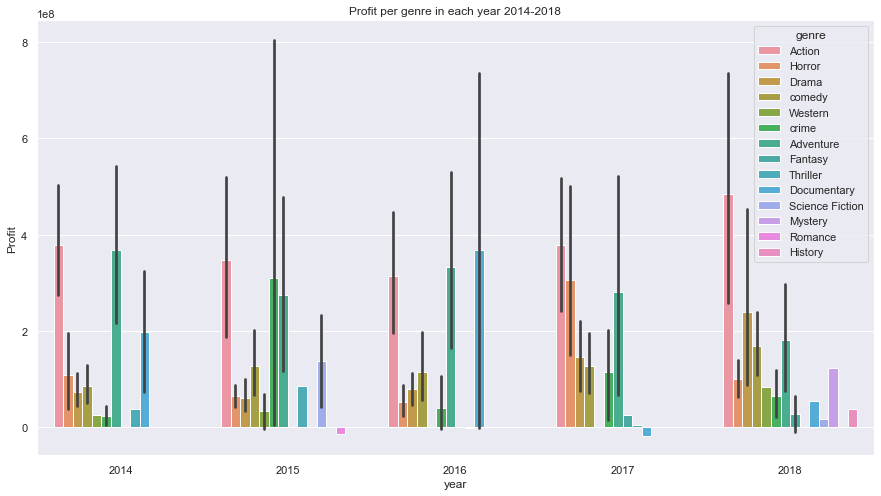

In [ ]:
# to compare the performance of various gennres in terms of profits per year
sns.set(rc={'figure.figsize': (15,8)})
sns.barplot(x='year', y='Profit', hue= 'genre', data=df_yrs)
plt.title('Profit per genre in each year 2014-2018');

Documentary took hold of 2016
Crime took over in 2015
Adventure took over 2014

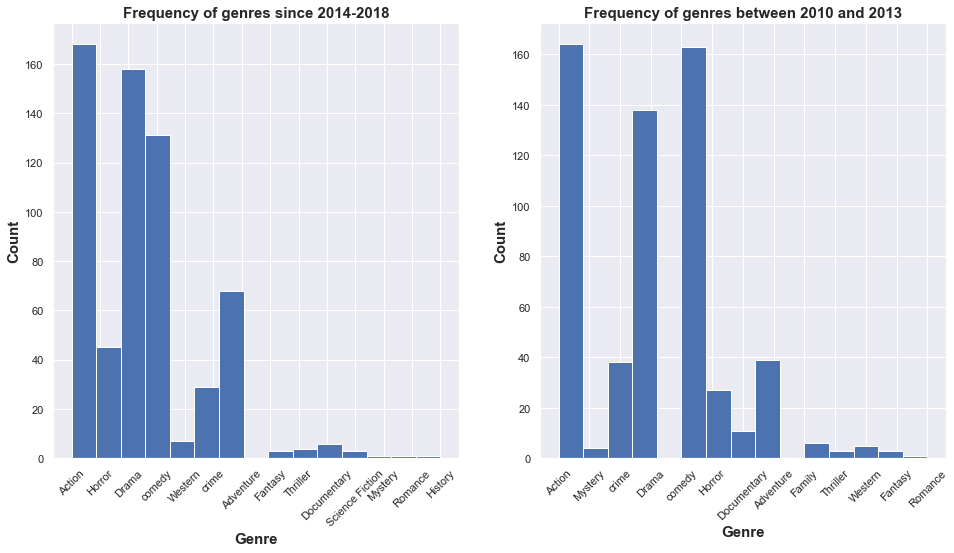

In [ ]:
df1 = df_yrs['genre'].sort_values(ascending=False)
plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.hist(x='genre',bins=15, data= df_yrs)
plt.ylabel("Count",fontdict={'size':15}, weight='bold')
plt.xticks(rotation='45')
plt.xlabel("Genre",fontdict={'size':15}, weight='bold')
plt.title("Frequency of genres since 2014-2018",fontdict={'size':15}, weight='bold')
# plt.show()
plt.subplot(1,2,2)
plt.hist(x='genre',bins=15, data= df_yrs2)
plt.ylabel("Count",fontdict={'size':15}, weight='bold')
plt.xticks(rotation='45')
plt.xlabel("Genre",fontdict={'size':15}, weight='bold')
plt.title("Frequency of genres between 2010 and 2013",fontdict={'size':15}, weight='bold')
plt.show()

Action movies are the most common types of movies that have been published in the various studios

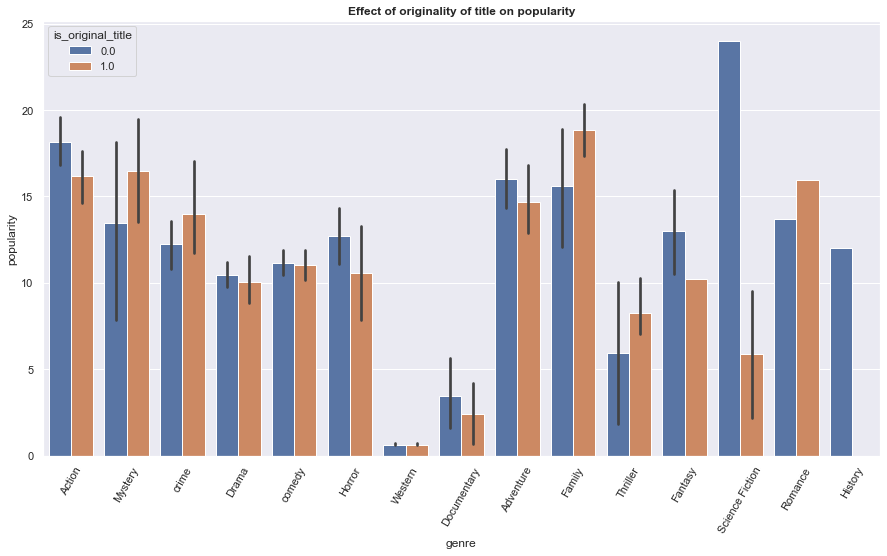

In [ ]:
sns.barplot(x=df['genre'], y=df['popularity'],hue='is_original_title', data=df)
plt.xticks(rotation='60')
plt.title('Effect of originality of title on popularity',fontdict={'fontweight':'bold'});

Out of the genres that were analysed only 33% had changed its original title and got a higher popularity while 47% had not changed the original title but had a higher popularity. The remaining 20% got no significant effect on their popularity after changing the original title.

In [ ]:
df.isna().sum()

ordering             0
title                0
region               0
is_original_title    0
averagerating        0
numvotes             0
studio               0
year                 0
production_budget    0
domestic_gross       0
foreign_gross        0
original_language    0
popularity           0
Total_Gross          0
Profit               0
genre                0
dtype: int64

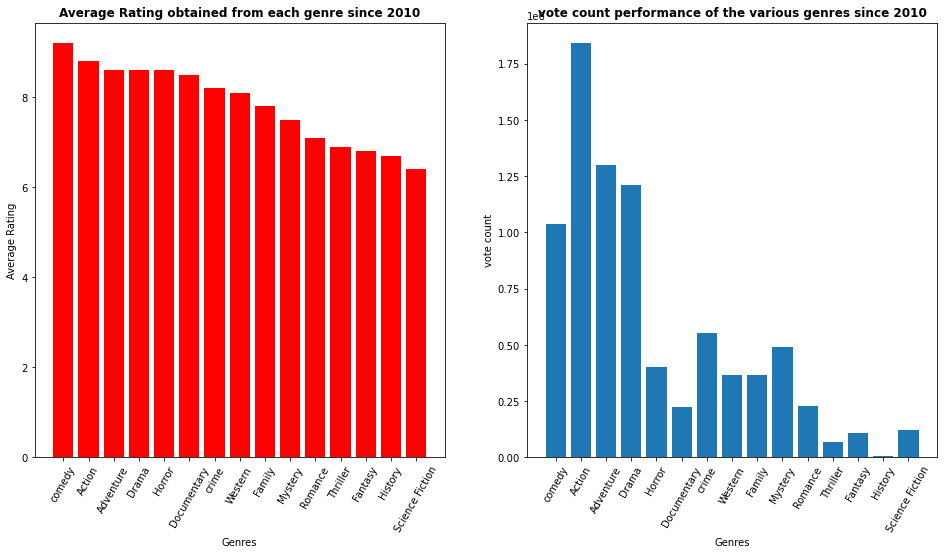

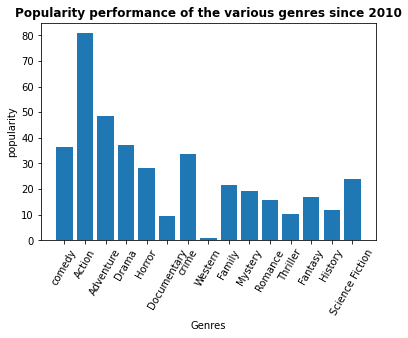

In [104]:
#plot of vote average in each genre
fig, ax = plt.subplots(figsize=(25,8))

ax1=plt.subplot(1,3,1)
ax1.bar(x='genre', height='averagerating', color='r', data=df.sort_values('averagerating', ascending=False))
plt.xticks(rotation='60')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating obtained from each genre since 2010',fontweight='bold')

ax2=plt.subplot(1,3,2)
ax2.bar(x='genre',height='numvotes',data=df.sort_values('averagerating', ascending=False))
plt.xticks(rotation='60')
plt.xlabel('Genres')
plt.ylabel('vote count')
plt.title('vote count performance of the various genres since 2010',fontweight='bold')
plt.show();

ax3=plt.subplot()
ax3.bar(x='genre',height='popularity',data=df.sort_values('averagerating', ascending=False))
plt.xticks(rotation='60')
plt.xlabel('Genres')
plt.ylabel('popularity')
plt.title('Popularity performance of the various genres since 2010',fontweight='bold')
plt.show();


from the above visualisation, it can be concluded that the genres with the highest average rating included comedy, action, adventure and drama respectively. with the least being science fiction

In order of cumulative popularity across the 8 years; Action movies took the lead, followed by Adventure, Drama and comedy respectively. with the least popular genre being the western genre.

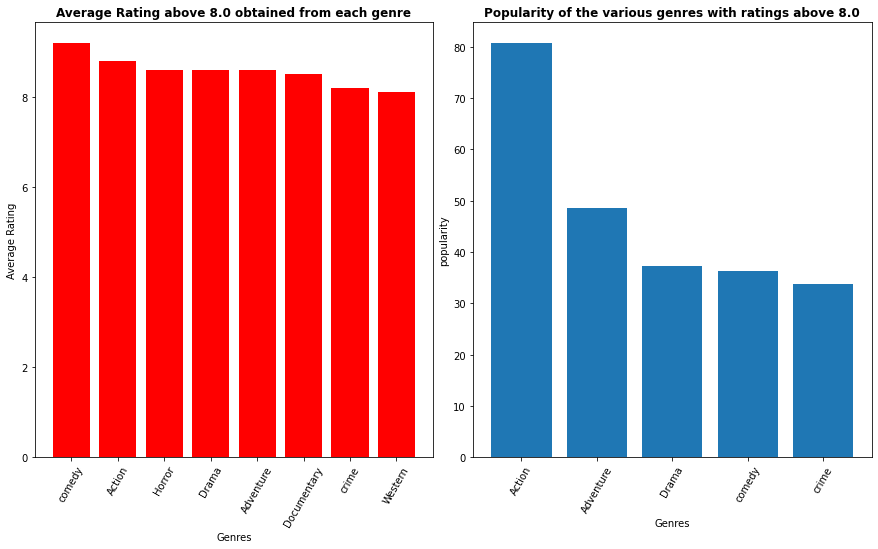

In [107]:
#from the plots above filter out the low rating below 8
#This only shows data with the best ratings
df2 = df[df['averagerating']>=8.0]
df3= df[df['popularity']>=30.0]
fig, ax = plt.subplots(figsize=(15,8))

ax1=plt.subplot(1,2,1)
ax1.bar(x='genre', height='averagerating', color='r', data=df2.sort_values('averagerating', ascending=False))
plt.xticks(rotation='60')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating above 8.0 obtained from each genre',fontweight='bold')

ax2=plt.subplot(1,2,2)
ax2.bar(x='genre',height='popularity',data=df3.sort_values('popularity', ascending=False))
plt.xticks(rotation='60')
plt.xlabel('Genres')
plt.ylabel('popularity')
plt.title('Popularity of the various genres with ratings above 8.0',fontweight='bold')
plt.subplots_adjust(wspace=0.1)
plt.show();

Action movies have both a high rating of above 8 and a popularity index of 80

In [ ]:
df.corr()

,ordering,is_original_title,averagerating,numvotes,year,production_budget,domestic_gross,foreign_gross,popularity,Total_Gross,Profit
ordering,1.000000,0.080061,0.122665,0.241636,-0.070907,0.226410,0.166002,0.188796,0.187385,0.184876,0.166373
is_original_title,0.080061,1.000000,-0.079142,-0.057555,-0.019870,-0.054537,-0.064896,-0.073724,-0.083526,-0.072213,-0.071753
averagerating,0.122665,-0.079142,1.000000,0.480127,-0.015002,0.149867,0.235112,0.225021,0.255764,0.230441,0.233798
numvotes,0.241636,-0.057555,0.480127,1.000000,-0.104274,0.511093,0.605250,0.596153,0.505773,0.605735,0.591172
year,-0.070907,-0.019870,-0.015002,-0.104274,1.000000,0.037202,0.106323,0.111499,0.266373,0.111428,0.120091
production_budget,0.226410,-0.054537,0.149867,0.511093,0.037202,1.000000,0.696343,0.777651,0.540491,0.764911,0.675732
domestic_gross,0.166002,-0.064896,0.235112,0.605250,0.106323,0.696343,1.000000,0.940169,0.523332,0.967600,0.968308
foreign_gross,0.188796,-0.073724,0.225021,0.596153,0.111499,0.777651,0.940169,1.000000,0.566008,0.995732,0.984271
popularity,0.187385,-0.083526,0.255764,0.505773,0.266373,0.540491,0.523332,0.566008,1.000000,0.561206,0.534344
Total_Gross,0.184876,-0.072213,0.230441,0.605735,0.111428,0.764911,0.967600,0.995732,0.561206,1.000000,0.991698


*CORRELATION INSIGHTS*

popularity has a high positive correlation with the number of votes(numvotes), profit and the total gross income.
domestic,foreign,profit gross is also highly influenced positively by vote count
the original title has little to no effect on the popularity and profit got from the viewers of the movie.


In [ ]:
df.describe()

,ordering,is_original_title,averagerating,numvotes,year,production_budget,domestic_gross,foreign_gross,popularity,Total_Gross,Profit
count,1227.000000,1227.000000,1227.000000,1.227000e+03,1227.000000,1.227000e+03,1.227000e+03,1.227000e+03,1227.000000,1.227000e+03,1.227000e+03
mean,12.437653,0.306438,6.410024,1.277492e+05,2013.676447,4.872191e+07,6.381277e+07,1.596303e+08,13.052960,2.234430e+08,1.747211e+08
std,6.813525,0.461202,1.000435,1.701205e+05,2.522743,5.712070e+07,8.869858e+07,2.426600e+08,8.141997,3.274492e+08,2.861324e+08
min,1.000000,0.000000,1.600000,5.000000e+00,2010.000000,5.000000e+04,0.000000e+00,0.000000e+00,0.600000,0.000000e+00,-8.905748e+07
25%,10.000000,0.000000,5.800000,2.198950e+04,2011.000000,1.000000e+07,8.853599e+06,2.000561e+07,8.352500,2.892440e+07,1.167656e+07
50%,12.000000,0.000000,6.500000,7.220900e+04,2014.000000,2.800000e+07,3.549734e+07,6.980726e+07,11.360000,1.056028e+08,7.099711e+07
75%,16.000000,1.000000,7.100000,1.614980e+05,2016.000000,6.000000e+07,7.890421e+07,1.867988e+08,15.952500,2.706128e+08,2.065931e+08
max,43.000000,1.000000,9.200000,1.841066e+06,2018.000000,4.106000e+08,7.000596e+08,2.048134e+09,80.773000,2.726950e+09,2.426950e+09


# Conclusion And Recommendation

*Conslusion*

The common genres in the top 5 list of ratings above 8 and popularity include action, drama, adventure.

Popularity has a positive correlation with the numvotes because the numvotes describes the number of people who gave a rating, an increase in the number of people giving the rating means an increase in the popularity of the movie.

An increase in the popularity resulted in an increase in the the gross income raised from the movie. An increase in the gross income raised from a movie increases the profit earned.

The originality of the title had a negligible correlation with the popularity.

Popularity have a positive correlation coefficient with the production budget. Since the production budget entails the cost of releasing the movie to the public, if one increases the advertisements and the quality of the videos from the movies, the popularity will definitely raise as seen in the analysis

*Recommendation*

I would recommend that Microsoft studio should venture into the comedy,drama,adventure and action genres for having the highest rating and being among the top 5 genres with a high popularity.

Microsoft should concentrate on having very quality video movies since an increase in the production cost which would be as a result of the inputs done into the creation of the movie resulted to an increase in the domestic gross, foreign gross, popularity and average rating of the movie.

Changing the title of a movie has a very low correlation to the popularity of the movie. This is because on comparing the genres that had titles changed, only 33% had a higher popularity than movies in the same genre with original titles.

Microsoft should also venture in running ads and other advertisement medias to increase the popularity of the movies on their movie studio. Ensuring that they provide a good system of movie recommendation to their viewers would have them at the top of the studios.